<a href="https://colab.research.google.com/github/Vishnu1119v/ineuron-Swiggy_Data_Analysis/blob/main/Swiggy_Data_Analysis_Banglore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Title - Analyzing Swiggy : Bangalore delivery outlet data

### Technologies - Business Intelligence
### Domain - Food industry

#### Problem Statement:
The online food ordering market includes foods prepared by restaurants, prepared by
independent people, and groceries being ordered online and then picked up or delivered.
The first online food ordering service, World Wide Waiter (now known as Waiter.com),
was founded in 1995. Online food ordering is the process of ordering food from a website
or other application. The product can be either ready-to-eat food or food that has not been
specially prepared for direction consumption.

Do ETL : Extract-Transform-Load the dataset and find for me some information from this large data. This is form of data mining.
What all information can be achieved by mining this data, would be explained in class by the trainer
Find key metrics and factors and show the meaningful relationships between attributes.

### import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Load data

In [ ]:
df=pd.read_csv("/content/Swiggy_Bangalore_Outlet_Details.csv")

In [ ]:
df

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450
...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,₹ 219
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,₹ 600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,₹ 193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,₹ 200


In [ ]:
df.dtypes

Shop_Name       object
Cuisine         object
Location        object
Rating          object
Cost_for_Two    object
dtype: object

In [ ]:
df.shape

(118, 5)

In [ ]:
df.dtypes

Shop_Name       object
Cuisine         object
Location        object
Rating          object
Cost_for_Two    object
dtype: object

In [ ]:
df.columns

Index(['Shop_Name', 'Cuisine', 'Location', 'Rating', 'Cost_for_Two'], dtype='object')

In [ ]:
df.isna()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
113,False,False,False,False,False
114,False,False,False,False,False
115,False,False,False,False,False
116,False,False,False,False,False


In [ ]:
df.isna().sum()

Shop_Name       0
Cuisine         0
Location        0
Rating          0
Cost_for_Two    0
dtype: int64

#### No null values

# Data Cleaning

In [ ]:
df.drop_duplicates()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450
...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,₹ 219
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,₹ 600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,₹ 193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,₹ 200


No duplicate values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Shop_Name     118 non-null    object
 1   Cuisine       118 non-null    object
 2   Location      118 non-null    object
 3   Rating        118 non-null    object
 4   Cost_for_Two  118 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [ ]:
df.Rating.unique()

array(['4.3', '4.4', '4.1', '4.2', '3.9', '3.8', '4', '3.7', '3.6', '4.8',
       '4.5', '4.6', '--'], dtype=object)

### drop data with rating --(unknown)

In [ ]:
df.drop(df[df['Rating']=="--"].index,inplace=True)

In [ ]:
df['Rating'].unique()

array(['4.3', '4.4', '4.1', '4.2', '3.9', '3.8', '4', '3.7', '3.6', '4.8',
       '4.5', '4.6'], dtype=object)

In [ ]:
df['Rating']=df['Rating'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Shop_Name     117 non-null    object 
 1   Cuisine       117 non-null    object 
 2   Location      117 non-null    object 
 3   Rating        117 non-null    float64
 4   Cost_for_Two  117 non-null    object 
dtypes: float64(1), object(4)
memory usage: 5.5+ KB


## formatting the cost of two column

In [ ]:
df.Cost_for_Two.unique()

array(['₹ 150', '₹ 400', '₹ 126', '₹ 450', '₹ 350', '₹ 200', '₹ 500',
       '₹ 247', '₹ 550', '₹ 300', '₹ 129', '₹ 250', '₹ 268', '₹ 600',
       '₹ 527', '₹ 130', '₹ 257', '₹ 280', '₹ 399', '₹ 220', '₹ 800',
       '₹ 100', '₹ 178', '₹ 120', '₹ 251', '₹ 650', '₹ 132', '₹ 153',
       '₹ 219', '₹ 193'], dtype=object)

In [ ]:
def Cost_for_Two(value):
  cost=value.split(' ')[1]
  return cost

In [ ]:
df['Cost_for_Two']=df['Cost_for_Two'].apply(Cost_for_Two)

In [ ]:
df.Cost_for_Two.unique()

array(['150', '400', '126', '450', '350', '200', '500', '247', '550',
       '300', '129', '250', '268', '600', '527', '130', '257', '280',
       '399', '220', '800', '100', '178', '120', '251', '650', '132',
       '153', '219', '193'], dtype=object)

In [ ]:
df['Cost_for_Two']=df.Cost_for_Two.astype('int')

In [ ]:
df.describe()

,Rating,Cost_for_Two
count,117.000000,117.000000
mean,4.096581,320.760684
std,0.209240,137.850784
min,3.600000,100.000000
25%,4.000000,200.000000
50%,4.100000,300.000000
75%,4.300000,400.000000
max,4.800000,800.000000


###### mean rating is 4.06 which means that the food is pretty good in banglore restaurants
###### minimum cost is 100 and maximum cost is 800
###### mean cost is 321 for two people which is affordable

# Rating Analysis

Text(0.5, 1.0, 'Rating')

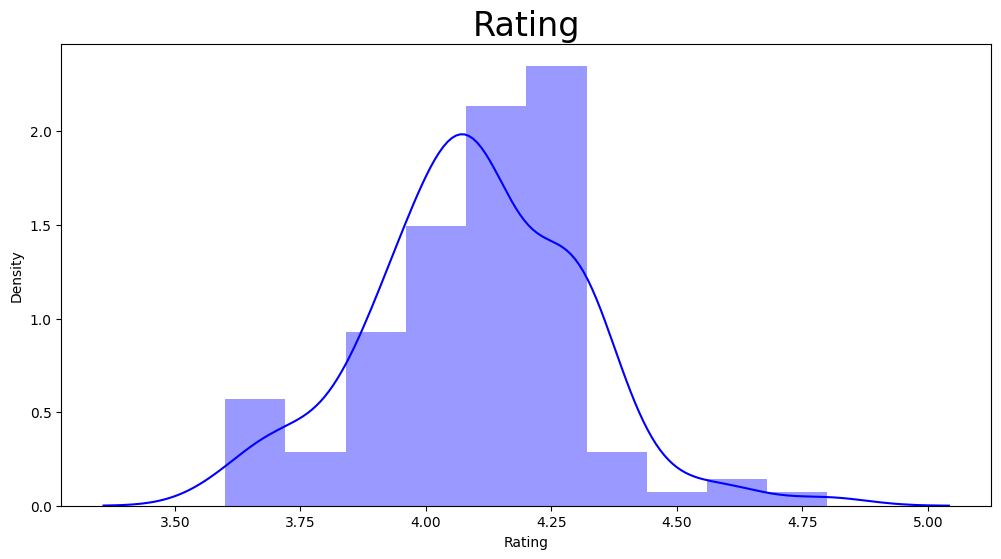

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df['Rating'], color='Blue')
plt.title('Rating', fontsize=24)

##### From the above distribution more than 50% restaurants are having rating greater than median rating(4.1).
##### maximum rating is 4.8
##### it is clear that these restaurants are consider to be good by customers

# Cost for Two Analysis

Text(0.5, 1.0, 'cost for two people analysis')

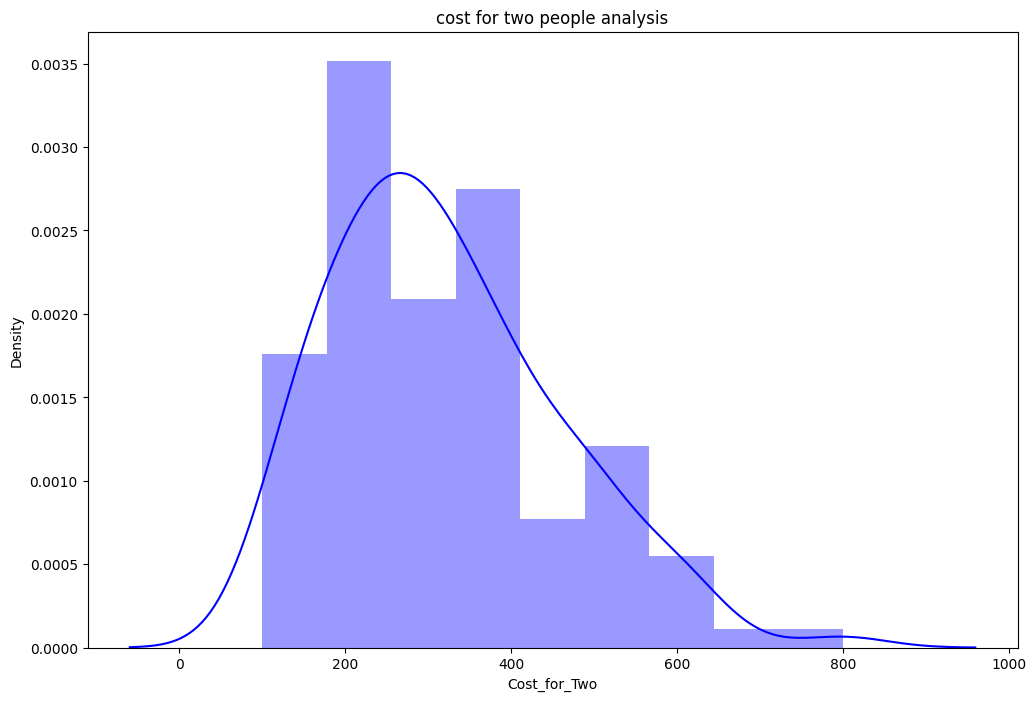

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df['Cost_for_Two'], color='blue')
plt.title('cost for two people analysis', fontsize=12)

more than 50% restaurants have cost for two people above median value which indicate than most of the restaurants are costly for dining

# Area wise Data Analysis

In [ ]:
df.Location.unique()

array(['Koramangala, Koramangala', 'Sector 5, HSR',
       '6th Block, Koramangala', 'HSR, HSR', '5th Block, Koramangala',
       'Koramangala 4th  Block, Koramangala', 'BTM 2nd Stage, BTM',
       'BTM, BTM', '9th Main road, Koramangala', 'outer ring road, BTM',
       '7th Block, Koramangala', '1st MAin, Koramangala',
       'Bommanahalli, BTM', '6th block, Koramangala', 'Sector 4, HSR',
       'BTM 1st stage, BTM', 'Jakkasandra Extn, Koramangala',
       'Marutinagar Main Road, BTM', '1st Block, Koramangala',
       '4th Cross, BTM', 'koramangala, Koramangala', 'BTM 2nd stage, BTM',
       '3rd main, BTM', 'HSR 1st sector, HSR', 'Sector 7, HSR',
       '3rd Sector, HSR', 'Chocolate Factory Road, BTM',
       '16th Main Road, 2nd Stage, BTM', '1st Stage, BTM',
       'Hosur Main Road, Koramangala',
       '1st Cross Road, 5th Block, Near Jyothi Nivas College, Koramangala',
       'Mico Layout, BTM', '4th Cross, Koramangala',
       '4th Block, Koramangala', 'Intermediate Ring Road, K

In [ ]:
Area=lambda a:a.split(',')[-1].lstrip(' ')

In [ ]:
df['Area']=df["Location"].apply(Area)

In [ ]:
df.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Area
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150,Koramangala
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400,HSR
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126,Koramangala
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400,HSR
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450,Koramangala


In [ ]:
df.Area.unique()

array(['Koramangala', 'HSR', 'BTM', 'Jayanagar'], dtype=object)

## Number of Shop in Each Area

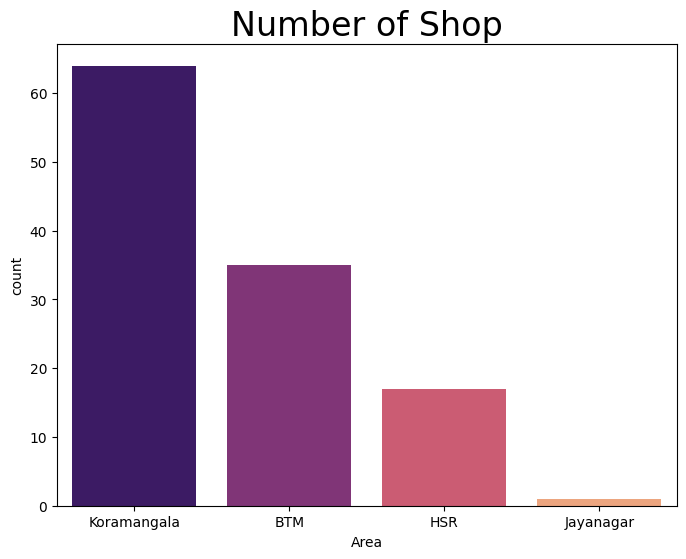

In [ ]:
## Plot a countplot to see how many shops are there in each area.
plt.figure(figsize=(8,6))
plt.title('Number of Shop', fontsize=24)
sns.countplot(x = 'Area', data = df, order = df['Area'].value_counts().index, palette='magma')
plt.show()

#### Koramangala Area have highest number of Restaurants

# Koramangala

In [ ]:
df_koramangala=df[df['Area']=='Koramangala']

In [ ]:
df_koramangala

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Area
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150,Koramangala
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126,Koramangala
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450,Koramangala
5,Kitchens of Punjab,North Indian,"Koramangala 4th Block, Koramangala",4.2,350,Koramangala
9,Yumlane Pizza,"Pizzas, Italian, Mexican","9th Main road, Koramangala",3.8,150,Koramangala
...,...,...,...,...,...,...
112,Kritunga,"Andhra, Biryani","5th Block, Koramangala",3.9,500,Koramangala
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219,Koramangala
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193,Koramangala
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200,Koramangala


In [ ]:
df_koramangala.median()

Rating            4.1
Cost_for_Two    254.0
dtype: float64

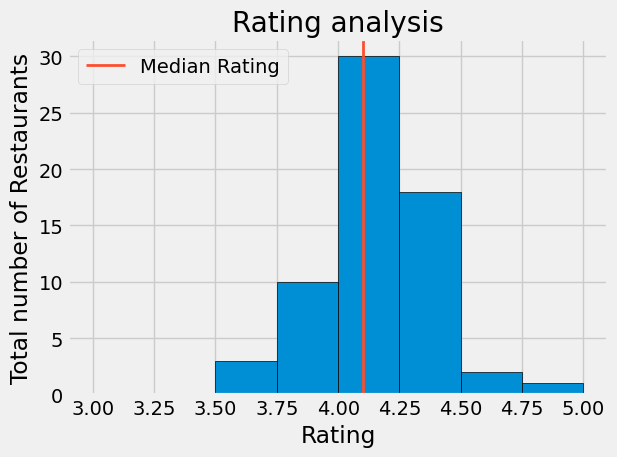

In [ ]:
plt.style.use('fivethirtyeight')
bins1=[3.00,3.50,3.75,4.00,4.25,4.50,4.75,5.00]
plt.hist(df_koramangala['Rating'], bins=bins1, edgecolor='black')
median_rating =4.1
color = '#fc4f30'
plt.axvline(median_rating, color=color, label='Median Rating', linewidth=2)

plt.legend()

plt.title('Rating analysis')
plt.xlabel('Rating')
plt.ylabel('Total number of Restaurants')

plt.tight_layout()
plt.show()

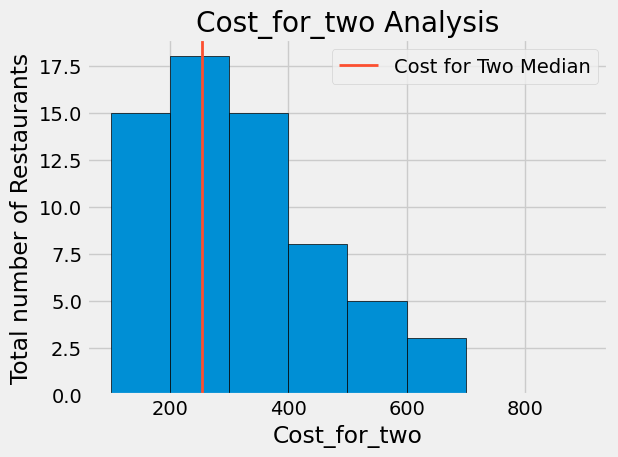

In [ ]:
plt.style.use('fivethirtyeight')
bins=[100,200,300,400,500,600,700,800,900]
plt.hist(df_koramangala['Cost_for_Two'], bins=bins, edgecolor='black')
median_cost =254
color = '#fc4f30'

plt.axvline(median_cost, color=color, label='Cost for Two Median', linewidth=2)

plt.legend()

plt.title('Cost_for_two Analysis')
plt.xlabel('Cost_for_two')
plt.ylabel('Total number of Restaurants')

plt.tight_layout()
plt.show()

# HSR

In [ ]:
df_hsr=df[df['Area']=='HSR']

In [ ]:
df_hsr

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Area
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400,HSR
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400,HSR
8,Hotel Manu,"South Indian, Kerala, Chinese, North Indian","HSR, HSR",4.1,350,HSR
19,Shree Khana Khazana,"Indian, Rajasthani","Sector 4, HSR",4.1,350,HSR
24,New Udupi Grand,"Chinese, Jain, North Indian, South Indian","HSR, HSR",4.3,150,HSR
36,Biriyani Zone,"North Indian, Chinese, Biryani","HSR 1st sector, HSR",4.1,600,HSR
37,Gongura's,"North Indian, Chinese, Biryani","Sector 7, HSR",3.8,300,HSR
39,Leon Grill,"Turkish, Portuguese, American","3rd Sector, HSR",4.3,300,HSR
41,Cakewala,Desserts,"HSR, HSR",4.3,450,HSR
57,Donne Biriyani House,South Indian,"3rd sector, HSR",4.0,300,HSR


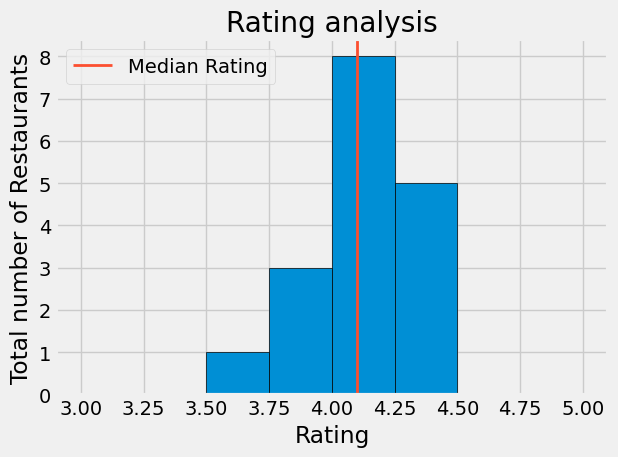

In [ ]:
plt.style.use('fivethirtyeight')
bins=[3.00,3.50,3.75,4.00,4.25,4.50,4.75,5.00]
plt.hist(df_hsr['Rating'], bins=bins, edgecolor='black')
median_rating =4.1
color = '#fc4f30'
plt.axvline(median_rating, color=color, label='Median Rating', linewidth=2)

plt.legend()

plt.title('Rating analysis')
plt.xlabel('Rating')
plt.ylabel('Total number of Restaurants')

plt.tight_layout()
plt.show()

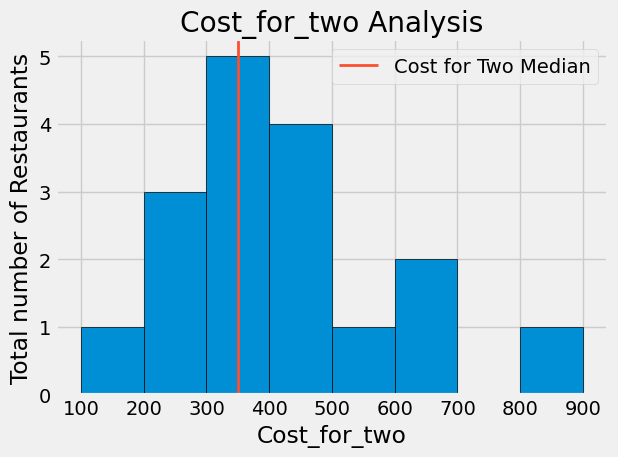

In [ ]:
plt.style.use('fivethirtyeight')
bins=[100,200,300,400,500,600,700,800,900]
plt.hist(df_hsr['Cost_for_Two'], bins=bins, edgecolor='black')
median_cost =350.0
color = '#fc4f30'

plt.axvline(median_cost, color=color, label='Cost for Two Median', linewidth=2)

plt.legend()

plt.title('Cost_for_two Analysis')
plt.xlabel('Cost_for_two')
plt.ylabel('Total number of Restaurants')

plt.tight_layout()
plt.show()

In [ ]:
df_hsr.median()

Rating            4.1
Cost_for_Two    350.0
dtype: float64

# BTM

In [ ]:
df_btm=df[df['Area']=='BTM']

In [ ]:
df_btm

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Area
6,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,"Fast Food, North Indian, Chinese","BTM 2nd Stage, BTM",4.1,200,BTM
7,La Pino'z Pizza,Italian,"BTM, BTM",3.9,500,BTM
10,Ambur Star Briyani,"Chinese, South Indian, North Indian, Desserts,...","outer ring road, BTM",4.1,500,BTM
17,Sri Lakshmi Dhaba,North Indian,"Bommanahalli, BTM",3.7,200,BTM
20,Just Bake - Cakes & confectioners,"Desserts, Bakery","BTM 1st stage, BTM",4.3,300,BTM
22,Hotel Godavari,"North Indian, Chinese, Hyderabadi","Marutinagar Main Road, BTM",4.0,400,BTM
25,Swad Punjab da,Indian,"BTM, BTM",4.1,250,BTM
27,High N Hungry,"Andhra, Biryani, Chinese, Desserts, Fast Food,...","4th Cross, BTM",4.1,350,BTM
31,Bengali Fun Foods,North Indian,"BTM 2nd stage, BTM",4.2,300,BTM
33,Oottupura,"Kerala, South Indian","BTM, BTM",4.3,268,BTM


In [ ]:
df_btm.median()

Rating            4.1
Cost_for_Two    300.0
dtype: float64

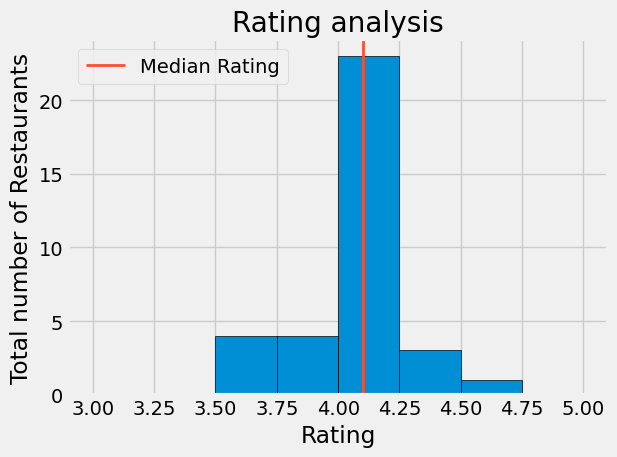

In [ ]:
plt.style.use('fivethirtyeight')
bins=[3.00,3.50,3.75,4.00,4.25,4.50,4.75,5.00]
plt.hist(df_btm['Rating'], bins=bins, edgecolor='black')
median_rating =4.1
color = '#fc4f30'
plt.axvline(median_rating, color=color, label='Median Rating', linewidth=2)

plt.legend()

plt.title('Rating analysis')
plt.xlabel('Rating')
plt.ylabel('Total number of Restaurants')

plt.tight_layout()
plt.show()

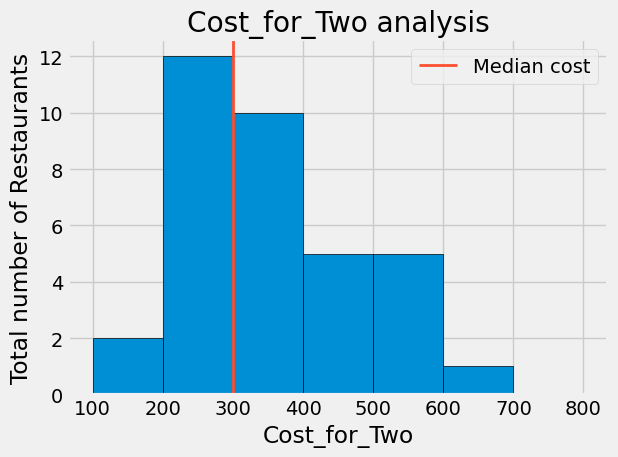

In [ ]:
plt.style.use('fivethirtyeight')
bins=[100,200,300,400,500,600,700,800]
plt.hist(df_btm['Cost_for_Two'], bins=bins, edgecolor='black')
median_cost =300.0
color = '#fc4f30'
plt.axvline(median_cost, color=color, label='Median cost', linewidth=2)

plt.legend()

plt.title('Cost_for_Two analysis')
plt.xlabel('Cost_for_Two')
plt.ylabel('Total number of Restaurants')

plt.tight_layout()
plt.show()

# Jayanagar

In [ ]:
df_jayanagar=df[df['Area']=='Jayanagar']

In [ ]:
df_jayanagar

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Area
74,CRAVY WINGS - The American Diner,"American, Fast Food","Bannerghatta Road, Jayanagar",4.3,300,Jayanagar



#Area wise Revenue Analysis

In [ ]:
df.groupby('Area')['Cost_for_Two'].sum()

Area
BTM            11518
HSR             6650
Jayanagar        300
Koramangala    19061
Name: Cost_for_Two, dtype: int64

In [ ]:
data=df.groupby('Area')['Cost_for_Two'].sum()
new = pd.DataFrame.from_dict(data)

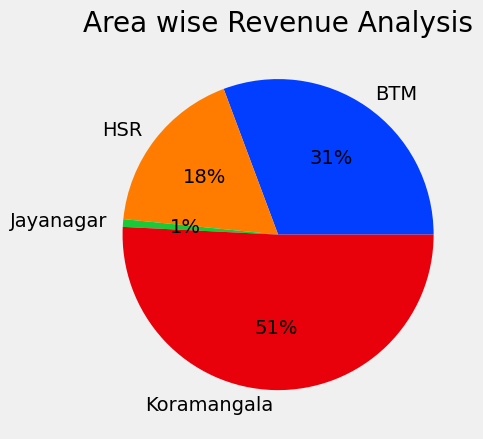

In [101]:
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.pie(new.Cost_for_Two, labels=['BTM','HSR','Jayanagar','Koramangala'], colors=palette_color, autopct='%.0f%%')
plt.title('Area wise Revenue Analysis')
# displaying chart
plt.show()

### Koramangala Area generates highest Revenue

# Cuisine Analysis

In [ ]:
df.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Area
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150,Koramangala
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400,HSR
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126,Koramangala
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400,HSR
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450,Koramangala


In [ ]:
df.Cuisine

0                                                 Sweets
1                 North Indian, Home Food, Thalis, Combo
2      South Indian, North Indian, Fast Food, Beverag...
3      American, Arabian, Chinese, Desserts, Fast Foo...
4                                          Chinese, Thai
                             ...                        
113                            Pan-Asian, Chinese, Asian
114    Arabian, Middle Eastern, North Indian, Grill, ...
115              North Indian, Chinese, Seafood, Biryani
116                                         North Indian
117                                      Andhra, Biryani
Name: Cuisine, Length: 117, dtype: object

In [ ]:
df['Cuisine'].unique()

array(['Sweets', 'North Indian, Home Food, Thalis, Combo',
       'South Indian, North Indian, Fast Food, Beverages, Jain',
       'American, Arabian, Chinese, Desserts, Fast Food, Mughlai, North Indian',
       'Chinese, Thai', 'North Indian',
       'Fast Food, North Indian, Chinese', 'Italian',
       'South Indian, Kerala, Chinese, North Indian',
       'Pizzas, Italian, Mexican',
       'Chinese, South Indian, North Indian, Desserts, Fast Food, Kerala, Andhra, Beverages, Mughlai, Seafood',
       'Desserts', 'Chinese, Andhra, Biryani, Seafood', 'Chinese',
       'South Indian, Chinese, Desserts, North Indian',
       'Arabian, Fast Food', 'Desserts, Beverages', 'Indian, Rajasthani',
       'Desserts, Bakery', 'Chinese, Healthy Food, North Indian',
       'North Indian, Chinese, Hyderabadi', 'Fast Food',
       'Chinese, Jain, North Indian, South Indian', 'Indian',
       'North Indian, South Indian, Chinese',
       'Andhra, Biryani, Chinese, Desserts, Fast Food, Seafood, South In

In [ ]:
def df_Cuisine(data):

    Cuisines_category = {}

    for i in data['Cuisine'].unique():
        cu = i.replace(' ','').split(',')
        for c in cu:
            Cuisines = c
            if Cuisines in Cuisines_category:
                Cuisines_category[Cuisines] += 1
            else:
                Cuisines_category[Cuisines] = 1

    Cuisine_Analysis = pd.DataFrame({'Cuisine' : Cuisines_category.keys(),'Frequency' : Cuisines_category.values()})

    return Cuisine_Analysis

In [ ]:
df_cuisine = df_Cuisine(df)

df_cuisine.sort_values('Frequency',ascending=False,inplace=True)

df_cuisine

,Cuisine,Frequency
11,Chinese,35
1,NorthIndian,32
5,SouthIndian,23
21,Biryani,18
6,FastFood,16
12,Desserts,15
19,Andhra,12
7,Beverages,9
9,American,8
20,Seafood,8


In [ ]:
df_cuisine_top=df_cuisine.head(10)

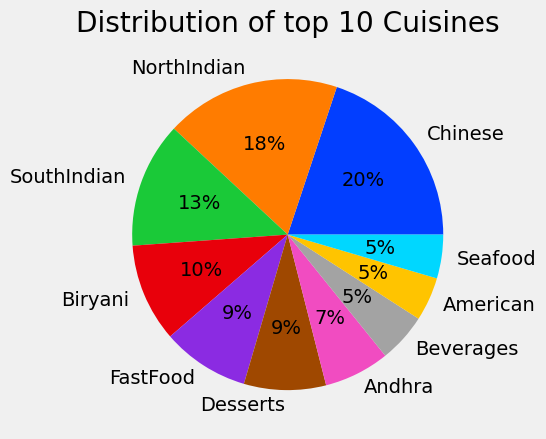

In [ ]:
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.pie(df_cuisine_top.Frequency, labels=df_cuisine_top.Cuisine, colors=palette_color, autopct='%.0f%%')
plt.title('Distribution of top 10 Cuisines')
# displaying chart
plt.show()

# Summary

##### Median rating of swiggy is 4.10 and median Cost for Two is 300
##### Max Rating and Cost for two is 4.8 and 800 rupees Approximately
##### Banglore City Restaurants Rating lies in between 4.0 to 4.8
##### Koramangala has highest number of restaurants and genertes highest revenue
##### The most popular food is from "Khichdi Experiment" with a rating of 4.8
##### The minimum cost for two is from "Tandoori merchant" .
##### From the above distribution more than 50% restaurants are having rating greater than median rating(4.1). maximum rating is 4.8
##### it is clear that these restaurants are consider to be good by customers
##### most popular cuisines sold by banglore Restaurants are Chinese(19.9%) ,North Indian(18.2%)  and South Indian (13.1%)